# 主成分分析


## 準備


### インポート


ライブラリをインポートする．


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

scikit-learn の `PCA` モデルをインポートする．


In [2]:
from sklearn.decomposition import PCA


### 説明変数の準備


`univ-power.csv` を pandas の `DataFrame` として読み込む．


In [3]:
x = pd.read_csv("univ-power.csv")

x


,num-books,num-rooms,female-ratio,num-faculties,num-students,num-doctors
0,29,21,26,30,10,6
1,32,7,14,18,10,7
2,77,64,87,71,85,71
3,91,69,100,83,96,91
4,70,87,84,88,67,91
...,...,...,...,...,...,...
145,73,60,59,54,70,65
146,59,25,45,48,37,32
147,58,17,31,23,24,25
148,70,56,76,62,67,88


説明変数を標準化する．


In [4]:
from sklearn.preprocessing import StandardScaler

x_standardized = pd.DataFrame(
    StandardScaler().fit_transform(x), columns=x.columns
)

x_standardized


,num-books,num-rooms,female-ratio,num-faculties,num-students,num-doctors
0,-1.089869,-0.886808,-0.804615,-0.930905,-1.417541,-1.127962
1,-0.950102,-1.546029,-1.296734,-1.499300,-1.417541,-1.094359
2,1.146397,1.137940,1.696991,1.011112,1.920118,1.056275
3,1.798641,1.373376,2.230121,1.579507,2.409642,1.728347
4,0.820275,2.220945,1.573962,1.816338,1.119080,1.728347
...,...,...,...,...,...,...
145,0.960041,0.949591,0.548713,0.205885,1.252587,0.854653
146,0.307797,-0.698460,-0.025426,-0.078312,-0.215984,-0.254268
147,0.261208,-1.075157,-0.599565,-1.262469,-0.794511,-0.489493
148,0.820275,0.761243,1.245882,0.584815,1.119080,1.627536


## 次元削減


保持する成分の数を 6 として，モデルを定義する．


In [5]:
pca = PCA(n_components=6)


In [6]:
pc_names = [f"PC{i+1}" for i in range(pca.n_components)]


モデルを説明変数に適合させ，説明変数に次元削減を適用する．


In [7]:
x_transformed = pd.DataFrame(
    pca.fit_transform(x_standardized),
    columns=pc_names,
)

x_transformed


,PC1,PC2,PC3,PC4,PC5,PC6
0,-2.546952,0.014808,0.328814,-0.331392,0.247082,-0.061482
1,-3.192309,-0.325995,0.135591,0.289910,0.096612,0.143128
2,3.245310,0.451240,-0.381275,0.508205,0.210692,-0.360747
3,4.527843,0.393265,-0.318516,0.742538,0.255266,-0.095458
4,3.808062,0.275880,0.557937,-0.695622,-0.385472,-0.316531
...,...,...,...,...,...,...
145,1.936989,-0.291028,-0.418691,0.427678,-0.286610,-0.435086
146,-0.402250,-0.154525,-0.091104,0.317355,0.449089,0.451982
147,-1.634274,-0.832479,-0.015162,0.711467,0.410630,0.097183
148,2.508633,0.068520,0.409679,0.706319,-0.242591,-0.155822


## 結果


### 第 1, 2 主成分のプロット


第 1 主成分を $x$ 軸に，第 2 主成分を $y$ 軸にして，散布図をプロットする．


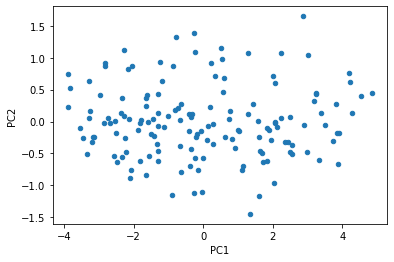

In [8]:
x_transformed.plot.scatter(x="PC1", y="PC2").plot()
plt.show()


### 寄与率と累積寄与率


第 6 主成分までのそれぞれの寄与率を表示する．


In [9]:
pd.DataFrame(
    pca.explained_variance_ratio_,
    index=pc_names,
)


,0
PC1,0.804057
PC2,0.054051
PC3,0.049957
PC4,0.039154
PC5,0.030101
PC6,0.022680


累積寄与率を NumPy の `cumsum` 関数で計算し，折れ線グラフとしてプロットする．


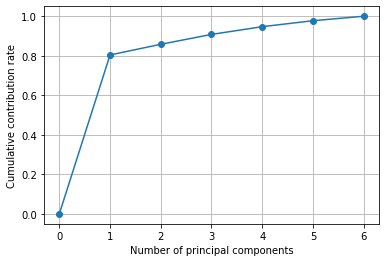

In [10]:
import matplotlib.ticker as ticker

plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot([0] + list(np.cumsum(pca.explained_variance_ratio_)), "-o")
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative contribution rate")
plt.grid()
plt.show()


### 主成分負荷量


第 6 主成分までのそれぞれの主成分負荷量を表示する．


In [11]:
components_loading = pd.DataFrame(
    pca.components_,
    index=pc_names,
    columns=x.columns,
)

components_loading


,num-books,num-rooms,female-ratio,num-faculties,num-students,num-doctors
PC1,0.397546,0.417847,0.410562,0.417156,0.398580,0.407327
PC2,-0.732606,-0.213198,0.373410,0.334262,0.377811,-0.154685
PC3,-0.279346,-0.003814,0.385340,-0.024319,-0.670241,0.568902
PC4,0.164974,-0.593188,0.208070,-0.522054,0.398138,0.382837
PC5,0.381840,-0.213542,0.650397,0.009895,-0.262098,-0.562840
PC6,0.232795,-0.618437,-0.277862,0.664093,-0.148194,0.152166


第 6 主成分までのそれぞれの主成分負荷量を棒グラフとしてプロットする．


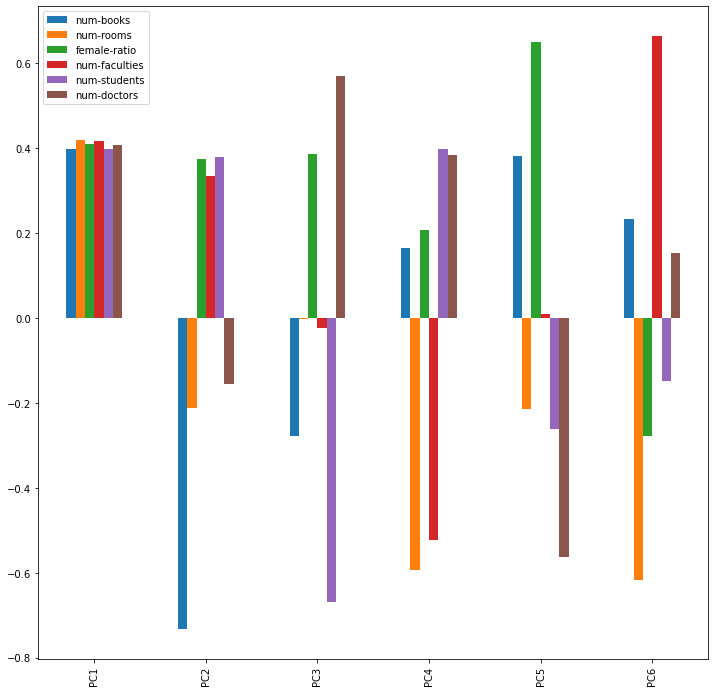

In [12]:
components_loading.plot.bar(figsize=(12,12))

plt.show()
